<a href="https://colab.research.google.com/github/Sadanand-666/my-projects/blob/main/ML_KIdney_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [17]:
data = pd.read_csv("/content/drive/MyDrive/ML Projects/KidneyDataset/kidney_disease_dataset.csv")  # Update this path if needed
print("Shape:", data.shape)
print(data.head())


Shape: (20538, 43)
   Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  54                     167                      1.023   
1                  42                     127                      1.023   
2                  38                     148                      1.016   
3                   7                      98                      1.017   
4                  67                     174                      1.015   

   Albumin in urine  Sugar in urine Red blood cells in urine  \
0                 1               4                   normal   
1                 3               2                   normal   
2                 0               0                 abnormal   
3                 4               0                 abnormal   
4                 1               1                   normal   

  Pus cells in urine Pus cell clumps in urine Bacteria in urine  \
0           abnormal              not present       not present   
1    

In [18]:
# Drop rows or fill missing values if any
data = data.dropna()  # or data.fillna(method='ffill')

# Separate features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Show class distribution
print("Class distribution before SMOTE:")
print(y.value_counts())


Class distribution before SMOTE:
Target
No_Disease        16432
Low_Risk           2054
Moderate_Risk       821
High_Risk           821
Severe_Disease      410
Name: count, dtype: int64


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML Projects/KidneyDataset/kidney_disease_dataset.csv")
df.head()


,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [20]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changes to the original
X_encoded = X.copy()

# Encode all object (string) columns
label_encoders = {}
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le


In [21]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
Target
No_Disease        16432
Low_Risk          16432
Moderate_Risk     16432
Severe_Disease    16432
High_Risk         16432
Name: count, dtype: int64


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Classification Report:
                 precision    recall  f1-score   support

     High_Risk       0.98      0.96      0.97      3320
      Low_Risk       0.92      0.87      0.90      3303
 Moderate_Risk       0.98      0.96      0.97      3384
    No_Disease       0.82      0.92      0.87      3192
Severe_Disease       1.00      0.98      0.99      3233

      accuracy                           0.94     16432
     macro avg       0.94      0.94      0.94     16432
  weighted avg       0.94      0.94      0.94     16432



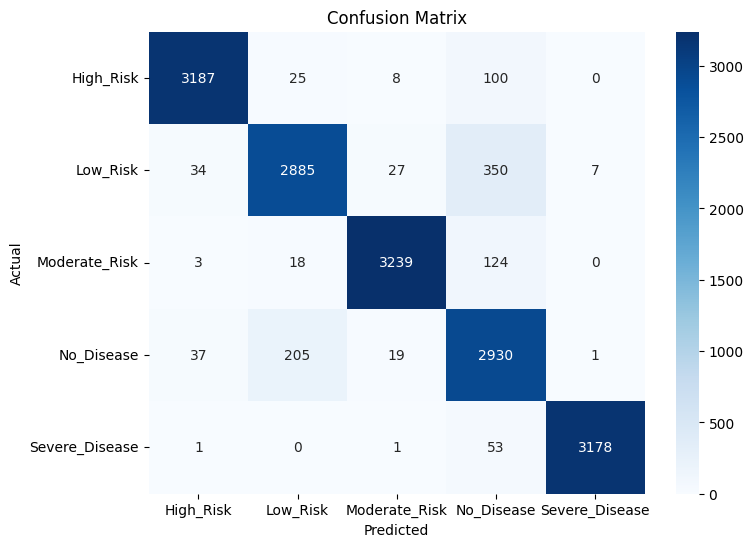

In [26]:
y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
